# Capstone Project

In [28]:
import pandas as pd
import numpy as np

In [6]:
path = "/Users/ag78400/OneDrive - Anthem/machine_learning_basics/Data/drive-download-20210319T040341Z-001/Python/XYZCorp_LendingData.txt"

In [7]:
data = pd.read_csv(path,sep="\t")

In [149]:
data1 = pd.read_csv(path,sep="\t")

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [18]:
data['inq_fi'].isna().sum()>800000

True

In [19]:
for i in data.columns:
    if data[i].isna().sum()>800000:
        data = data.drop([i], axis=1)

data.shape

(855969, 56)

In [22]:
for i in data.columns:
    if data[i].isna().sum()>200000:
        data = data.drop([i], axis=1)

data.shape

(855969, 51)

In [23]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0


In [217]:
data.isna().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
pymnt_plan                   0
purpose                      0
title                       33
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                 446
total_acc                    0
initial_list_status          0
out_prncp                    0
out_prncp_inv                0
total_py

In [29]:
data_cat = data.select_dtypes(object)
data_num = data.select_dtypes(np.number)

In [100]:
data[["annual_inc", "emp_length", "grade"]]

,annual_inc,emp_length,grade
0,24000.0,10+ years,B
1,30000.0,10+ years,C
2,12252.0,10+ years,C
3,49200.0,10+ years,C
4,80000.0,10+ years,B
...,...,...,...
855964,31000.0,8 years,B
855965,79000.0,10+ years,B
855966,35000.0,5 years,D
855967,64400.0,1 year,E


# K-Means Clustering for Imputation

In [87]:
training_data = data[["annual_inc", "grade"]]

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
training_data[["grade"]] = training_data[["grade"]].apply(le.fit_transform)

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [89]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)

In [90]:
km.fit(training_data)

KMeans(n_clusters=10)

In [91]:
km.labels_

array([6, 6, 6, ..., 6, 0, 3], dtype=int32)

In [92]:
data["target"] = km.predict(training_data)

In [103]:
X = data.dropna()[["target"]]
y = data.dropna()[["emp_length"]]

In [104]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X,y)

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [105]:
test_data = data[data.isnull().any(axis=1)][["target"]]

In [106]:
pred = lr.predict(test_data)

In [107]:
data.loc[data.isnull().any(axis=1),"emp_length"] = pred

# Dropping Column

In [109]:
data.drop(["emp_title"], axis=1, inplace=True)

In [130]:
lst = data["title"].value_counts()[data["title"].value_counts() < 100].index
for i in range(len(data)):
    if data.iloc[i, 17] in lst:
        data.iloc[i, 17] = "Other"

KeyboardInterrupt: 

In [129]:
data[['title']].value_counts()

title                  
Debt consolidation         398089
Credit card refinancing    159228
Other                      106879
Home improvement            38633
Debt Consolidation          15469
                            ...  
Debt elimination               10
Debt consoladation             10
Debt Relief                    10
Debt Payments                  10
Finally                        10
Length: 1354, dtype: int64

<AxesSubplot:ylabel='Frequency'>

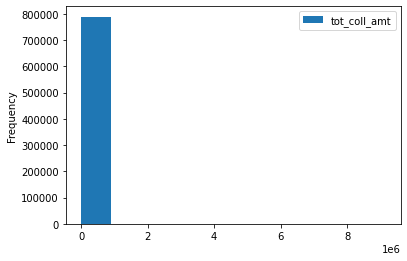

In [135]:
data[["tot_coll_amt"]].plot.hist()

In [139]:
data[["tot_coll_amt"]].describe()

,tot_coll_amt
count,"788,656.00"
mean,225.41
std,"10,489.45"
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,"9,152,545.00"


In [138]:
pd.options.display.float_format = "{:,.2f}".format

# Removing Null Values of Numerical Columns

In [195]:
data[['tot_coll_amt']] = data1[['tot_coll_amt']] 

In [196]:
data[['tot_coll_amt']] = data[['tot_coll_amt']].fillna(-1)

In [197]:
data['tot_coll_amt'] = pd.cut(data['tot_coll_amt'], bins=[-10, -0.99999,1000,50000,300000, 1000000, 10000000], 
                                labels=["Not Available", 'Good', 'Normal_debt', "Big_Debt", "Huge_Debt", "Nonsense"])

In [198]:
data[["tot_coll_amt"]].value_counts()

tot_coll_amt 
Good             760209
Not Available     67313
Normal_debt       28305
Big_Debt            139
Huge_Debt             2
Nonsense              1
dtype: int64

In [202]:
data[['tot_cur_bal']] = data1[['tot_cur_bal']] 

In [203]:
data[['tot_cur_bal']] = data[['tot_cur_bal']].fillna(-1)

In [206]:
data['tot_cur_bal'] = pd.cut(data['tot_cur_bal'], bins=[-10, -0.99999,1000,50000,300000, 1000000, 10000000], 
                                labels=["Not Available", 'Good', 'Normal_debt', "Big_Debt", "Huge_Debt", "Nonsense"])

In [207]:
data[["tot_cur_bal"]].value_counts()

tot_cur_bal  
Big_Debt         376444
Normal_debt      308711
Huge_Debt        100684
Not Available     67313
Nonsense           1555
Good               1262
dtype: int64

In [210]:
data[['total_rev_hi_lim']] = data1[['total_rev_hi_lim']] 

In [211]:
data[['total_rev_hi_lim']] = data[['total_rev_hi_lim']].fillna(-1)

In [212]:
data['total_rev_hi_lim'] = pd.cut(data['total_rev_hi_lim'], bins=[-10, -0.99999,1000,50000,300000, 1000000, 10000000], 
                                labels=["Not Available", 'Good', 'Normal_debt', "Big_Debt", "Huge_Debt", "Nonsense"])

In [213]:
data[["total_rev_hi_lim"]].value_counts()

total_rev_hi_lim
Normal_debt         658657
Big_Debt            127710
Not Available        67313
Good                  1161
Huge_Debt             1105
Nonsense                23
dtype: int64

In [216]:
data.drop(['last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med'], axis=1, inplace=True)

In [218]:
data.drop(['revol_util'], axis=1, inplace=True)

In [223]:
data.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
pymnt_plan                 0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int 

In [222]:
data.dropna(subset=["title"], axis=0, inplace=True)

In [232]:
data['issue_d'] = pd.to_datetime(data['issue_d'])

In [225]:
data_cat = data.select_dtypes(object)
data_num = data.select_dtypes(np.number)

In [234]:
data[['issue_d']].head()

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
4,2011-12-01


In [244]:
data.index = data["issue_d"].values

In [249]:
data = data.sort_index()

In [259]:
data_train = data["2007-06-01":"2015-05-31"]

In [268]:
data_test = data["2015-05-31":]

In [270]:
data_train.shape[0]+data_test.shape[0]

855936

In [271]:
data.shape

(855936, 46)

In [269]:
data_test.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,target
2015-06-01,51828014,55257778,"12,000.00","12,000.00","12,000.00",60 months,18.25,306.36,E,E1,...,0.00,0.00,1.00,INDIVIDUAL,0.00,Normal_debt,Normal_debt,Normal_debt,0,6
2015-06-01,51878964,55308750,"3,300.00","3,300.00","3,300.00",36 months,7.26,102.29,A,A4,...,0.00,0.00,1.00,INDIVIDUAL,0.00,Good,Big_Debt,Normal_debt,0,6
2015-06-01,51978179,55407931,"5,000.00","5,000.00","5,000.00",36 months,7.89,156.43,A,A5,...,0.00,0.00,1.00,INDIVIDUAL,0.00,Good,Normal_debt,Normal_debt,0,3
2015-06-01,51887571,55317317,"10,200.00","10,200.00","10,200.00",60 months,17.57,256.64,D,D4,...,0.00,0.00,1.00,INDIVIDUAL,0.00,Good,Big_Debt,Normal_debt,0,0
2015-06-01,51858142,55287901,"7,700.00","7,700.00","7,700.00",36 months,17.57,276.72,D,D4,...,0.00,0.00,1.00,INDIVIDUAL,0.00,Good,Big_Debt,Normal_debt,0,6


In [274]:
data_train[["default_ind"]].value_counts()

default_ind
0              552806
1               46154
dtype: int64